#Summary
This colab is dedicated to exploring and experimenting MNIST database.It is commonly used as a benchmark dataset for training and testing machine learning models, particularly for image classification tasks. The machine learning model based on TensorFlow. It includes the high-level neural networks API called Keras, which simplifies the process of building, training, and deploying deep learning models. The colab includes the comparison between Neural Network and Convolution Neural Network using Confusion Matrix.


#Importing Libraries
1. MNIST dataset
2. MatplotLibrary
3. TensorFlow
4. Numpy
5. Keras
6. Pickles
7. Google Drive
8. Confusion Matrix
9. Seaborn

In [13]:
#Import the necessary libraries
from keras.datasets import mnist  #MNIST dataset
import matplotlib.pyplot as plt   #Plotting library
import tensorflow as tf   #open-source machine learning framework library
import numpy as np    #Computing numerical library
from keras.utils import to_categorical #Convert integers to binary matrix
from keras import layers  #Sequential Class layers
from keras import models  #Sequential Class models
import pickle #Serializing data library
from google.colab import drive  #Google Drive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  #Confusion Matrix
import seaborn as sns #Statistical data visualization library

#MNIST dataset
The dataset is split into two sets, **TRAINING** and **TESTING** sets. Each sets consist pairs of image(X) and label(Y).

The training set has 60,000 images while the testing set has 10,000 images.

Each image has a dimension of 28 x 28 in *GRAYSCALE*. Thus, the shape of the training images are (60000, 28, 28)

The value of each image is between 0-255; The value of each label is from 0-9

11490434/11490434 [==============================] - 0s 0us/step
Training images: (60000, 28, 28)
Testing images: (10000, 28, 28)


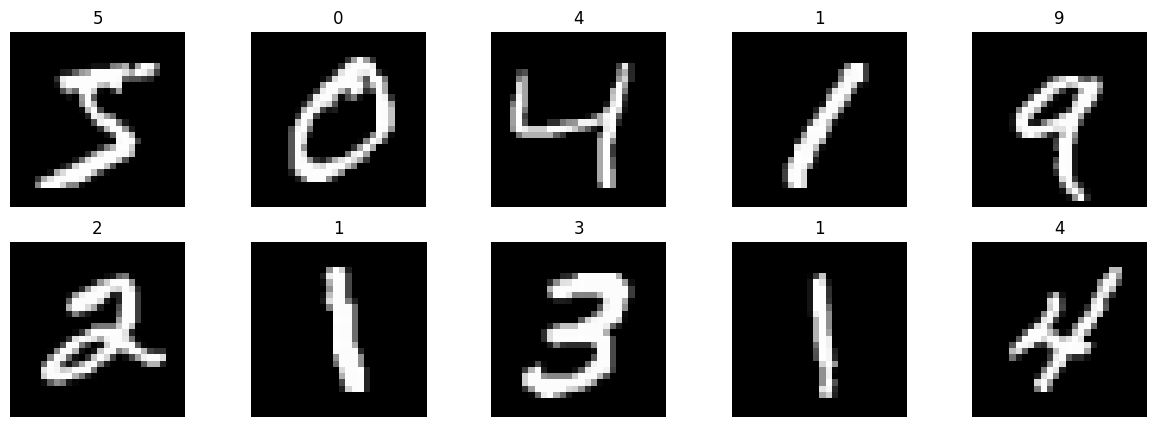

In [2]:
#Load the datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'Training images: {x_train.shape}')
print(f'Testing images: {x_test.shape}')

#Display MNIST dataset
row = 2
column = 5
fig ,axes = plt.subplots(row,column,figsize=(15,5))
for i in range(row):
  for j in range(column):
    axes[i,j].axis('off')
    axes[i,j].set_title(y_train[j+i*column])
    axes[i,j].imshow(x_train[j+i*column], cmap='gray')

Normalization is a preprocessing step in machine learning. The goal of normalization is to scale and center the input data, making it easier for the model to learn and converge during training. The L2 normalization is express as:

L2 = $\sqrt{x_1 + x_2 + x_3 + ...}$ \

The TensorFlow provides convenient functions for L2 regularization.The pixel values of each image is now range from 0 to 1


In [3]:
#TensorFlow regularization to the datasets
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

The labels are intergers by default (0-9). But the output of the Neural Network(NN) should be in binary, (3 = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]), thus Keras provides convenient functions for one-hot conversions.

In [4]:
#One hot conversions
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

print(f'{y_train[0]} = {train_labels[0]}')

5 = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


The inputs for Keras Neural Network needs to be in a specified dimension.

Input = [ batch, height, width, channel ]

Example = [ 32, 28, 28, 1 ]

In [5]:
#Input reshaping
train_images = x_train.reshape((60000,28,28,1))
test_images = x_test.reshape((10000,28,28,1))

# Simple Neural Network (KERAS)
The Sequential class in Keras is a linear stack of layers that allows you to build and train a neural network model layer by layer. It represents a simple linear stack of neural network layers, where each layer has a single input tensor and produces a single output tensor. Before training the model, you need to compile it using the compile method. This involves specifying the optimizer, loss function, and metrics to use during training. Finally, the model can be trained and evaluated with 'fit' and 'evaluate'.


In [6]:
#Initializing each layers in the model
model = models.Sequential(name="Simple_Neural_Network")
model.add(layers.Input(shape = (28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()

# Initializing the training parameters
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# Training phase
print("------------Training Phase---------------")
model.fit(train_images, train_labels, epochs=5, batch_size = 64)

# Testing phase
print("------------Testing Phase---------------")
accuracy = model.evaluate(test_images, test_labels)
print("------------Result---------------")
print(f'accuracy = {round(accuracy[1]*100, 3)}%')

#Renaming the model variable
K_NN = model  #Keras_NeuralNetwork

Model: "Simple_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
------------Training Phase---------------
Epoch 1/5
938/938 [==============================] - 5s 3ms/step - loss: 0.3663 - accuracy: 0.9001
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1828 - accuracy: 0.9472
Epoch 3/5
938/938 [==========

#Convolutional Neural Network (KERAS)

In [7]:
#Initializing each layers in the model
model = models.Sequential(name="Convolutional_Neural_Network")
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))
model.summary()

# Initializing the training parameters
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
# Training phase
print("------------Training Phase---------------")
model.fit(train_images, train_labels, epochs=5, batch_size = 64)
# Testing phase
print("------------Testing Phase---------------")
accuracy = model.evaluate(test_images, test_labels)
print("------------Result---------------")
print(f'accuracy = {round(accuracy[1]*100, 3)}%')

#Renaming the model variable
K_CNN = model  #Keras_NeuralNetwork

Model: "Convolutional_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 57

#Confusion Matrix
A confusion matrix is a table used in classification to evaluate the performance of a machine learning model. It provides a summary of the predictions made by a model compared to the actual ground truth. The matrix displays the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

313/313 [==============================] - 1s 2ms/step


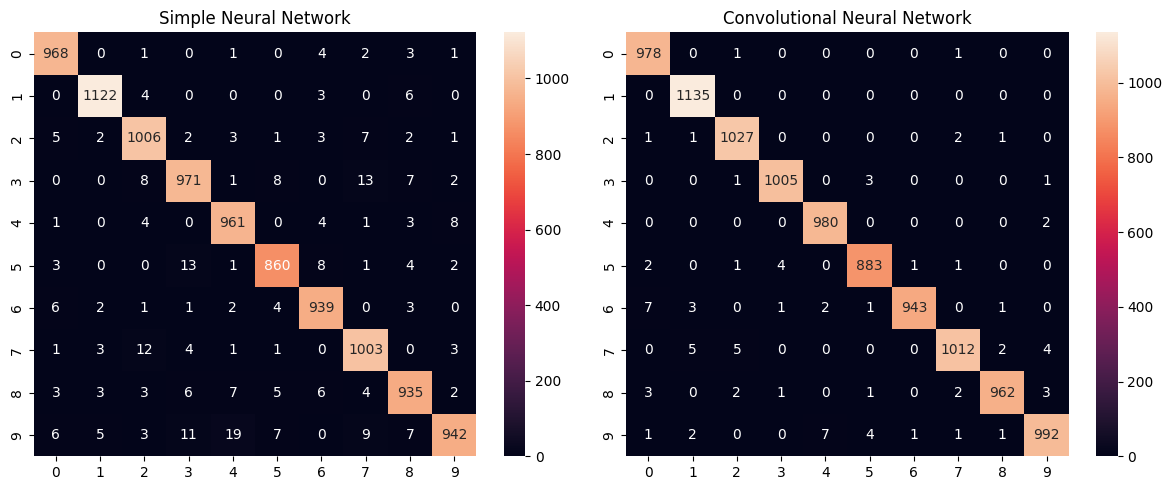

In [15]:
#Model predictions in binary
predictionsA = K_NN.predict(test_images)
predictionsB = K_CNN.predict(test_images)

#Storing the prediction result in Integers
_ = []
for i, value in enumerate(predictionsA):
  _.append(np.argmax(value))
cmA = confusion_matrix(y_test, _)
_ = []
for i, value in enumerate(predictionsB):
  _.append(np.argmax(value))
cmB = confusion_matrix(y_test, _)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the first confusion matrix
sns.heatmap(cmA, annot=True, fmt="d", ax=axes[0])
axes[0].set_title('Simple Neural Network')

# Plot the second confusion matrix
sns.heatmap(cmB, annot=True, fmt="d", ax=axes[1])
axes[1].set_title('Convolutional Neural Network')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#Pickles

Pickles allows you to convert complex Python objects, such as dictionaries, lists, or even custom objects, into a binary format that can be stored in a file or transmitted over a network. Later, you can deserialize the binary data back into Python objects. This is used for saving and loading objects across platforms.

In [10]:
# Connect google drive to the notebook
drive.mount('/content/drive')

#Save the models to Google Drive
with open('/content/drive/MyDrive/Colab Notebooks/MNIST/MNIST_NN_Keras.pickle', 'wb') as f:
  pickle.dump(K_NN, f)
with open('/content/drive/MyDrive/Colab Notebooks/MNIST/MNIST_CNN_Keras.pickle', 'wb') as f:
  pickle.dump(K_CNN, f)

# #Load the models from Google Drive
# K_NN = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/MNIST/MNIST_NN_Keras.pickle', 'rb'))
# K_CNN = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/MNIST/MNIST_CNN_Keras.pickle', 'rb'))

Mounted at /content/drive
